In [3]:
import uproot

In [4]:
def natural_sort(list, key=lambda s:s):
    """
    Sort the list into natural alphanumeric order.
    http://stackoverflow.com/questions/4836710/does-python-have-a-built-in-function-for-string-natural-sort
    """

    import re

    def get_alphanum_key_func(key):
        convert = lambda text: int(text) if text.isdigit() else text
        return lambda s: [convert(c) for c in re.split('([0-9]+)', key(s))]

    sort_key = get_alphanum_key_func(key)

    lc = sorted(list, key=sort_key)

    return lc

combineCards.py naive_stat_unc_2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900_8.txt -S > naive_shapes.txt

combine -M FitDiagnostics naive_shapes.txt --robustHesse 1 --forceRecreateNLL --saveShapes --saveNormalizations --saveOverall --saveWithUncertainties

In [55]:
#f_in = "/home/users/dspitzba/WH/CMSSW_10_2_9/src/WH_studies/Plots/python/data/fitDiagnostics_800_100_ARC_update.root"
#f_in = "/home/users/dspitzba/TOP/CMSSW_10_2_13/src/fitDiagnostics.root"
f_in = "../both_fitDiagnostics.root"

In [56]:
f = uproot.open(f_in)

In [57]:
test = f['shapes_fit_b']

In [58]:
test.keys()

['ch1_bin0;1',
 'ch1_bin0/data;1',
 'ch1_bin0/QCD;1',
 'ch1_bin0/Wjets;1',
 'ch1_bin0/Zjets;1',
 'ch1_bin0/other;1',
 'ch1_bin0/signal;1',
 'ch1_bin0/tt;1',
 'ch1_bin0/total;1',
 'ch1_bin0/total_signal;1',
 'ch1_bin0/total_background;1',
 'ch1_bin0/total_covar;1',
 'ch1_bin10;1',
 'ch1_bin10/data;1',
 'ch1_bin10/QCD;1',
 'ch1_bin10/Wjets;1',
 'ch1_bin10/Zjets;1',
 'ch1_bin10/other;1',
 'ch1_bin10/signal;1',
 'ch1_bin10/tt;1',
 'ch1_bin10/total;1',
 'ch1_bin10/total_signal;1',
 'ch1_bin10/total_background;1',
 'ch1_bin10/total_covar;1',
 'ch1_bin11;1',
 'ch1_bin11/data;1',
 'ch1_bin11/QCD;1',
 'ch1_bin11/Wjets;1',
 'ch1_bin11/Zjets;1',
 'ch1_bin11/other;1',
 'ch1_bin11/signal;1',
 'ch1_bin11/tt;1',
 'ch1_bin11/total;1',
 'ch1_bin11/total_signal;1',
 'ch1_bin11/total_background;1',
 'ch1_bin11/total_covar;1',
 'ch1_bin12;1',
 'ch1_bin12/data;1',
 'ch1_bin12/QCD;1',
 'ch1_bin12/Wjets;1',
 'ch1_bin12/Zjets;1',
 'ch1_bin12/other;1',
 'ch1_bin12/signal;1',
 'ch1_bin12/tt;1',
 'ch1_bin12/tota

In [59]:
in_file = uproot.open(f_in)
shapes = ['shapes_fit_b', 'shapes_fit_s', 'shapes_prefit']
bins = [ x.split('/')[0].replace(';1','') for x in in_file[shapes[0]] ]

In [60]:
list(set(bins))

['ch1_bin4',
 'ch1_bin13',
 'ch1_bin15',
 'ch1_bin0',
 'ch1_bin35',
 'ch1_bin18',
 'ch1_bin36',
 'total_overall',
 'ch1_bin19',
 'ch1_bin30',
 'ch1_bin34',
 'ch1_bin3',
 'ch1_bin17',
 'total_background',
 'ch1_bin8',
 'ch1_bin10',
 'ch1_bin27',
 'ch1_bin14',
 'ch1_bin26',
 'ch1_bin12',
 'ch1_bin28',
 'ch1_bin7',
 'ch1_bin37',
 'ch1_bin9',
 'ch1_bin33',
 'ch1_bin16',
 'ch1_bin21',
 'ch1_bin23',
 'ch1_bin38',
 'ch1_bin5',
 'ch1_bin39',
 'ch1_bin22',
 'ch1_bin31',
 'total_signal',
 'ch1_bin20',
 'ch1_bin32',
 'overall_total_covar',
 'ch1_bin29',
 'total_data',
 'ch1_bin6',
 'ch1_bin1',
 'ch1_bin24',
 'ch1_bin11',
 'ch1_bin2',
 'ch1_bin25']

In [61]:
import numpy as np
def read_fitdiagnostics(in_file):
    shapes = ['shapes_fit_b', 'shapes_fit_s', 'shapes_prefit']
    bins = list(set([ x.split('/')[0].replace(';1','') for x in in_file[shapes[0]] ]))
    #print (bins)
    bins.remove('total_overall')
    bins.remove('overall_total_covar')
    bins.remove('total_data')
    bins.remove('total_background')
    bins.remove('total_signal')
    res = {}
    for shape in shapes:
        res[shape] = {}
        for bin in bins:
            #print (bin)
            res[shape][bin] = {}
            processes = [ x.replace(';1','') for x in in_file[shape][bin].keys() ]
            for process in processes:
                res[shape][bin][process] = {}
                if process == 'data':
                    res[shape][bin][process]['counts'] = in_file[shape][bin][process].values()[1]
                    res[shape][bin][process]['errors'] = np.sqrt(in_file[shape][bin][process].values()[1])
                else:
                    res[shape][bin][process]['counts'] = in_file[shape][bin][process].counts()
                    res[shape][bin][process]['errors'] = in_file[shape][bin][process].errors()

    return res

In [62]:
res = read_fitdiagnostics(in_file)

In [63]:
bins = natural_sort(list(res['shapes_prefit'].keys()))

In [64]:
import pandas as pd

In [65]:
pd.DataFrame(res['shapes_fit_b'])

,ch1_bin4,ch1_bin13,ch1_bin15,ch1_bin0,ch1_bin35,ch1_bin18,ch1_bin36,ch1_bin19,ch1_bin30,ch1_bin34,...,ch1_bin31,ch1_bin20,ch1_bin32,ch1_bin29,ch1_bin6,ch1_bin1,ch1_bin24,ch1_bin11,ch1_bin2,ch1_bin25
data,"{'counts': [209.36599731445312], 'errors': [14...","{'counts': [258.510986328125], 'errors': [16.0...","{'counts': [47.176998138427734], 'errors': [6....","{'counts': [19144.376953125], 'errors': [138.3...","{'counts': [118.5780029296875], 'errors': [10....","{'counts': [8.244000434875488], 'errors': [2.8...","{'counts': [62.777000427246094], 'errors': [7....","{'counts': [8.798999786376953], 'errors': [2.9...","{'counts': [4830.73779296875], 'errors': [69.5...","{'counts': [313.3420104980469], 'errors': [17....",...,"{'counts': [4063.48193359375], 'errors': [63.7...","{'counts': [19743.3203125], 'errors': [140.510...","{'counts': [1684.6280517578125], 'errors': [41...","{'counts': [5.368000030517578], 'errors': [2.3...","{'counts': [46.279998779296875], 'errors': [6....","{'counts': [4850.216796875], 'errors': [69.643...","{'counts': [131.93600463867188], 'errors': [11...","{'counts': [3779.68994140625], 'errors': [61.4...","{'counts': [1374.3489990234375], 'errors': [37...","{'counts': [39.823001861572266], 'errors': [6...."
QCD,"{'counts': [14.034998], 'errors': [4.046234716...","{'counts': [41.1279], 'errors': [11.1534305786...","{'counts': [1.6540017], 'errors': [1.410164040...","{'counts': [6796.023], 'errors': [616.98136114...","{'counts': [15.117079], 'errors': [4.039695761...","{'counts': [0.28904688], 'errors': [0.57783776...","{'counts': [5.5710006], 'errors': [3.505742011...","{'counts': [0.27803984], 'errors': [0.67480471...","{'counts': [1377.3103], 'errors': [144.3886422...","{'counts': [47.500904], 'errors': [8.818949047...",...,"{'counts': [315.84192], 'errors': [78.33360549...","{'counts': [6915.1724], 'errors': [640.4348834...","{'counts': [265.67773], 'errors': [32.78159854...","{'counts': [0.47085613], 'errors': [0.72574669...","{'counts': [0.84094036], 'errors': [0.93551184...","{'counts': [933.0569], 'errors': [103.43079207...","{'counts': [22.240992], 'errors': [4.817014167...","{'counts': [1075.2688], 'errors': [119.2788906...","{'counts': [229.97992], 'errors': [28.86287894...","{'counts': [2.0740035], 'errors': [2.169343595..."
Wjets,"{'counts': [11.7729845], 'errors': [3.74899140...","{'counts': [3.2499871], 'errors': [2.842256647...","{'counts': [0.01000001], 'errors': [2.22859474...","{'counts': [2434.6975], 'errors': [298.7851569...","{'counts': [4.721028], 'errors': [2.2034993864...","{'counts': [0.010000147], 'errors': [0.6506792...","{'counts': [4.720994], 'errors': [2.3544535540...","{'counts': [0.0100000845], 'errors': [1.116097...","{'counts': [29.710949], 'errors': [9.842602115...","{'counts': [6.294977], 'errors': [2.8263394311...",...,"{'counts': [261.37173], 'errors': [42.96716587...","{'counts': [997.7381], 'errors': [145.14998277...","{'counts': [182.87051], 'errors': [32.91541717...","{'counts': [0.009999862], 'errors': [0.4883524...","{'counts': [1.5739622], 'errors': [1.276365737...","{'counts': [657.2986], 'errors': [64.727908876...","{'counts': [6.282982], 'errors': [3.0123414563...","{'counts': [317.68872], 'errors': [45.45828616...","{'counts': [63.79391], 'errors': [12.397008128...","{'counts': [1.5739998], 'errors': [1.426267147..."
Zjets,"{'counts': [167.12302], 'errors': [10.75531073...","{'counts': [174.47473], 'errors': [12.84579515...","{'counts': [39.044044], 'errors': [5.443896426...","{'counts': [7524.948], 'errors': [373.84046062...","{'counts': [84.08036], 'errors': [8.3209737119...","{'counts': [6.230319], 'errors': [2.0301064990...","{'counts': [49.365], 'errors': [5.833169315030...","{'counts': [8.337543], 'errors': [2.8312784559...","{'counts': [448.85672], 'errors': [51.37409366...","{'counts': [177.30681], 'errors': [15.72057457...",...,"{'counts': [721.37085], 'errors': [58.35335251...","{'counts': [3297.6833], 'errors': [233.7352669...","{'counts': [443.88

In [66]:
def get_hist(
    res,
    bin_order,
    processes,
):
    values = {proc:np.array([]) for proc in processes}
    errors = {proc:np.array([]) for proc in processes}
    
    for bin in bin_order:
        for proc in processes:
            values[proc] = np.concatenate((
                values[proc],
                res[bin][proc]['counts'],
            ),
            axis=0,
            )
            errors[proc] = np.concatenate((
                errors[proc],
                res[bin][proc]['errors'],
            ),
            axis=0,
            )
    return values, errors
    
    

In [67]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [68]:
def add_uncertainty(values, errors, edges, ax, ratio=False):
    opts = {'step': 'post', 'label': 'Uncertainty', 'hatch': '///',
                    'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0, 'zorder':10.}
    
    if ratio:
        down = np.ones(len(values)) - errors/values
        up = np.ones(len(values)) + errors/values
    else:
        down = values - errors
        up = values + errors
    ax.fill_between(x=edges, y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

In [69]:
edges = np.linspace(0.5,40.5,41)

signal_1 = util.load('../1750_250.coffea')
signal_2 = util.load('../1900_250.coffea')

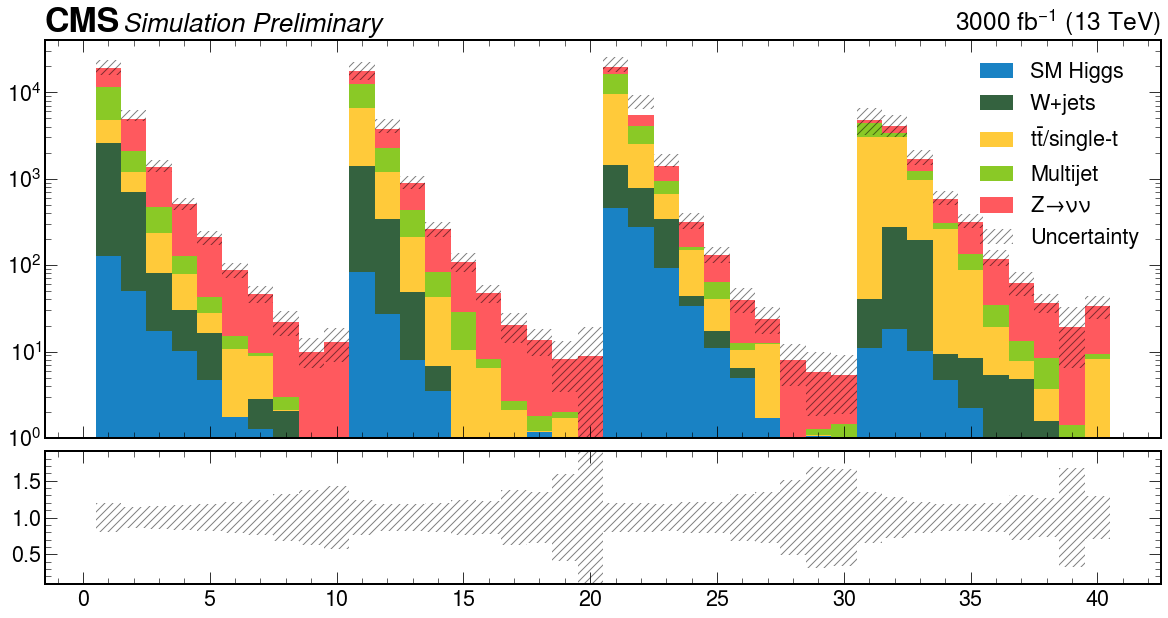

In [70]:

hists = get_hist(
    res["shapes_prefit"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

fig, (ax, rax) = plt.subplots(2,1,figsize=(20,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)


hep.cms.label(
    "Preliminary",
    data=False,
    lumi=3000,
    #com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)
add_uncertainty(hists[0]['total'], hists[1]['total'], edges, rax, ratio=True)


ax.legend()
ax.set_ylim(1,4e4)
rax.set_ylim(0.1,1.9)
ax.set_yscale('log')

plt.show()

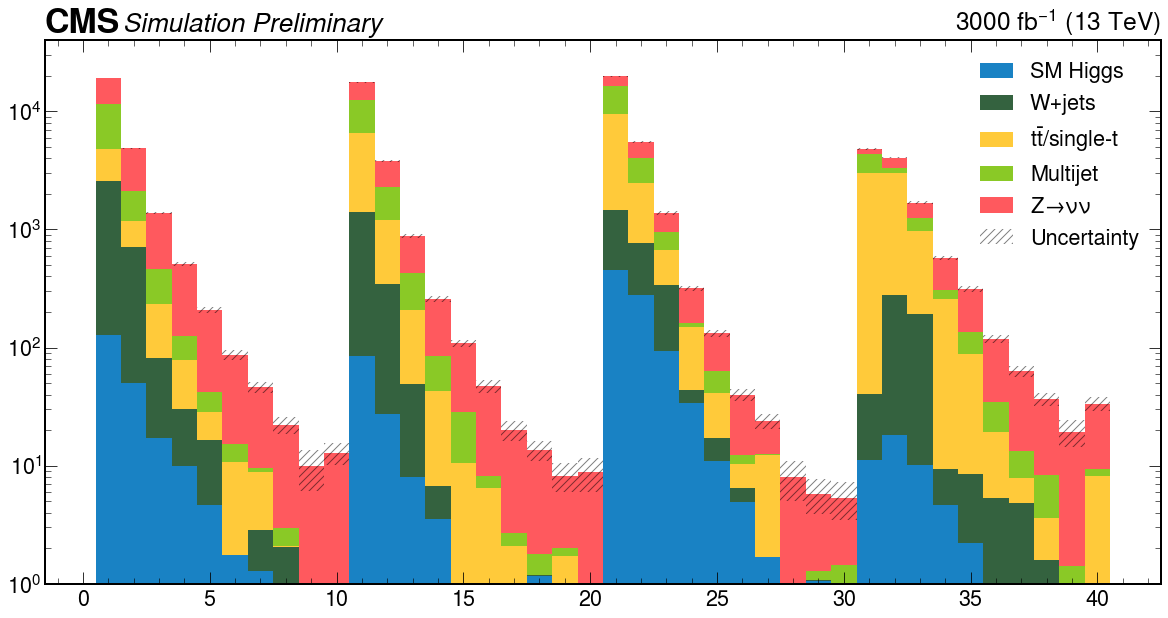

In [71]:
hists = get_hist(
    res["shapes_fit_b"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

f, ax = plt.subplots(figsize=(20,10))

hep.cms.label(
    "Preliminary",
    data=False,
    lumi=3000,
    #com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)

ax.legend()
ax.set_ylim(1,4e4)
ax.set_yscale('log')

plt.show()

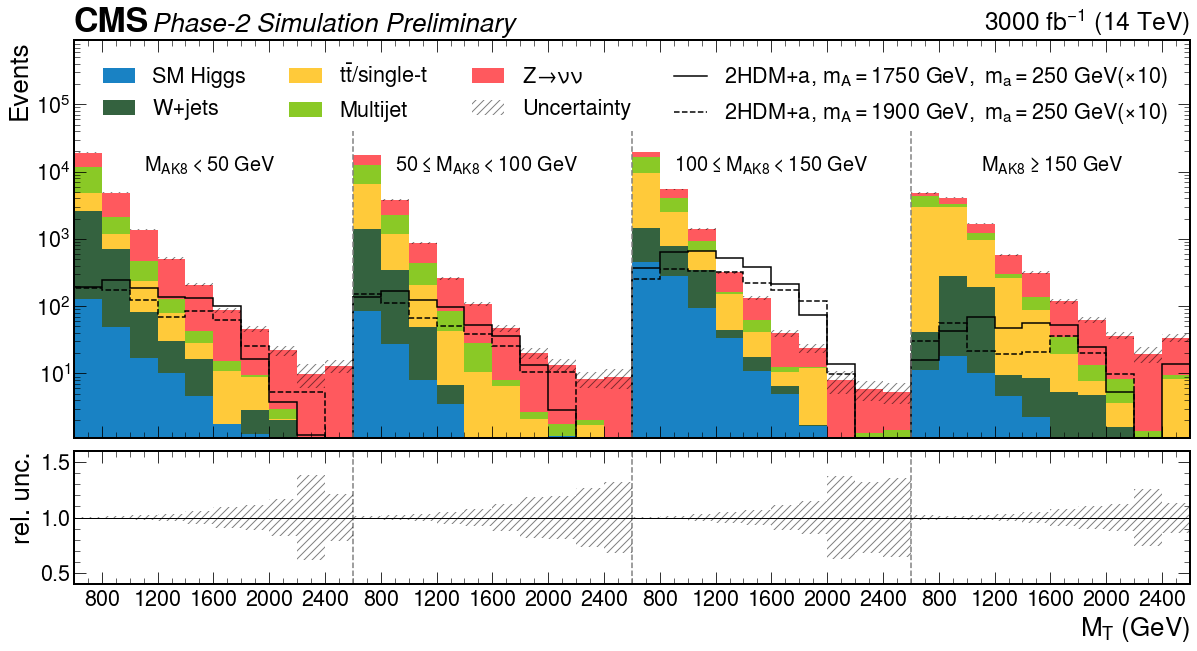

In [72]:
hists = get_hist(
    res["shapes_fit_b"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

#f, ax = plt.subplots(figsize=(20,10))
fig, (ax, rax) = plt.subplots(2,1,figsize=(20,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)


hep.cms.label(
    "Phase-2 Simulation Preliminary",
    data=True,
    lumi=3000,
    com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)
add_uncertainty(hists[0]['total'], hists[1]['total'], edges, rax, ratio=True)

hep.histplot(
    [signal_1*10],
    edges,
    histtype="step",
    stack=False,
    label=[r"2HDM+a, $m_{A}=1750\ GeV,\ m_{a}=250\ GeV (\times 10)$"],
    color=['black'],
    ax=ax)

hep.histplot(
    [signal_2*10],
    edges,
    histtype="step",
    stack=False,
    label=[r"2HDM+a, $m_{A}=1900\ GeV,\ m_{a}=250\ GeV (\times 10)$"],
    color=['black'],
    linestyle=['dashed'],
    ax=ax)



ax.legend(ncol=4)
ax.set_ylim(1.1,9e5)
ax.set_xlim(0.5,40.5)
ax.set_yscale('log')
rax.set_ylim(0.4,1.6)

# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.vlines.html
ax.vlines(10.5, 1.1, 4e4, colors="gray", linestyles='dashed')
ax.vlines(20.5, 1.1, 4e4, colors="gray", linestyles='dashed')
ax.vlines(30.5, 1.1, 4e4, colors="gray", linestyles='dashed')

rax.vlines(10.5, 0.4,1.6, colors="gray", linestyles='dashed')
rax.vlines(20.5, 0.4,1.6, colors="gray", linestyles='dashed')
rax.vlines(30.5, 0.4,1.6, colors="gray", linestyles='dashed')

rax.hlines(1, 0.5, 40.5, colors="black", linestyles='solid', linewidth=1)

# text
ax.text(3, 1e4, r"$M_{AK8}< 50\ GeV$", color="black", fontsize=20)
ax.text(12, 1e4, r"$50\leq M_{AK8}<100\ GeV$", color="black", fontsize=20)
ax.text(22, 1e4, r"$100\leq M_{AK8}<150\ GeV$", color="black", fontsize=20)
ax.text(33, 1e4, r"$M_{AK8}\geq 150\ GeV$", color="black", fontsize=20)

# labels
rax.set_xlabel(r'$M_{T}\ (GeV)$')
rax.set_ylabel(r'rel. unc.')
ax.set_ylabel(r'Events')

# Setting tick labels
ax.set_xticks(np.linspace(1.5, 39.5, 20))
ax.set_xticklabels(['800','1200','1600','2000', '2400']*4)


plt.show()

plot_name = "postfit_both"

fig.savefig(f'./{plot_name}.png')
fig.savefig(f'./{plot_name}.pdf')


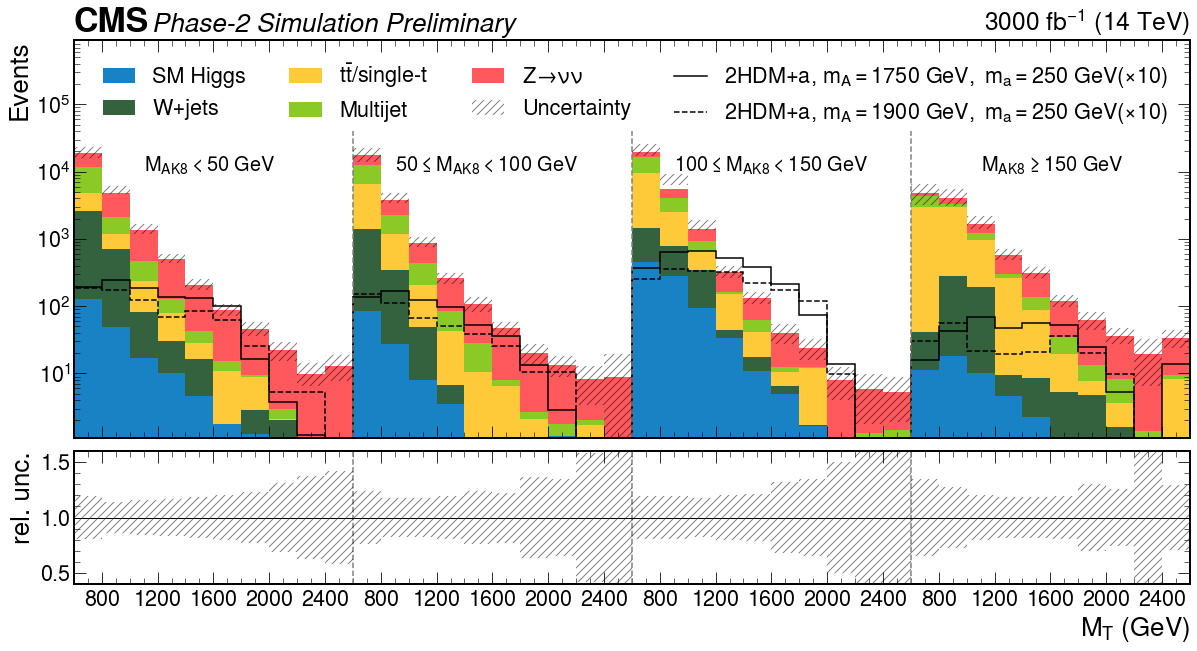

In [75]:
hists = get_hist(
    res["shapes_prefit"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

#f, ax = plt.subplots(figsize=(20,10))
fig, (ax, rax) = plt.subplots(2,1,figsize=(20,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)


hep.cms.label(
    "Phase-2 Simulation Preliminary",
    data=True,
    lumi=3000,
    com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)
add_uncertainty(hists[0]['total'], hists[1]['total'], edges, rax, ratio=True)

hep.histplot(
    [signal_1*10],
    edges,
    histtype="step",
    stack=False,
    label=[r"2HDM+a, $m_{A}=1750\ GeV,\ m_{a}=250\ GeV (\times 10)$"],
    color=['black'],
    ax=ax)

hep.histplot(
    [signal_2*10],
    edges,
    histtype="step",
    stack=False,
    label=[r"2HDM+a, $m_{A}=1900\ GeV,\ m_{a}=250\ GeV (\times 10)$"],
    color=['black'],
    linestyle=['dashed'],
    ax=ax)



ax.legend(ncol=4)
ax.set_ylim(1.1,9e5)
ax.set_xlim(0.5,40.5)
ax.set_yscale('log')
rax.set_ylim(0.4,1.6)

# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.vlines.html
ax.vlines(10.5, 1.1, 4e4, colors="gray", linestyles='dashed')
ax.vlines(20.5, 1.1, 4e4, colors="gray", linestyles='dashed')
ax.vlines(30.5, 1.1, 4e4, colors="gray", linestyles='dashed')

rax.vlines(10.5, 0.4,1.6, colors="gray", linestyles='dashed')
rax.vlines(20.5, 0.4,1.6, colors="gray", linestyles='dashed')
rax.vlines(30.5, 0.4,1.6, colors="gray", linestyles='dashed')

rax.hlines(1, 0.5, 40.5, colors="black", linestyles='solid', linewidth=1)

# text
ax.text(3, 1e4, r"$M_{AK8}< 50\ GeV$", color="black", fontsize=20)
ax.text(12, 1e4, r"$50\leq M_{AK8}<100\ GeV$", color="black", fontsize=20)
ax.text(22, 1e4, r"$100\leq M_{AK8}<150\ GeV$", color="black", fontsize=20)
ax.text(33, 1e4, r"$M_{AK8}\geq 150\ GeV$", color="black", fontsize=20)

# labels
rax.set_xlabel(r'$M_{T}\ (GeV)$')
rax.set_ylabel(r'rel. unc.')
ax.set_ylabel(r'Events')

# Setting tick labels
ax.set_xticks(np.linspace(1.5, 39.5, 20))
ax.set_xticklabels(['800','1200','1600','2000', '2400']*4)


plt.show()

plot_name = "prefit_both"

fig.savefig(f'./{plot_name}.png')
fig.savefig(f'./{plot_name}.pdf')